# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

# 데이터 분석부터 먼저 시작해보겠습니다.
### "구별 등록인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
#%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.3 seoul_people.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기
### 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* '1.3 seoul_people.csv'파일을 'seoul_people' 변수에 저장하고 그 Shape을 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * cp949 인코더를 사용해 주세요

In [2]:
import pandas as pd
raw_data = pd.read_csv('./1.3 seoul_people.csv',encoding='cp949',sep='\t')
raw_data.shape
seoul_people = raw_data[3:]
change = {'인구':'인구합계','인구.1':'남자합계','인구.2':'여자합계',
          '인구.3':'한국인계','인구.4':'한국인남자','인구.5':'한국인여자',
          '인구.6':'등록외국인계','인구.7':'등록외국인남자','인구.8':'등록외국인여자'}
seoul_people.head(2)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [3]:
seoul_people.rename(columns=change,inplace=True)

c:\Users\User\anaconda3\envs\jpytorch\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
seoul_people.head(2)

,기간,자치구,세대,인구합계,남자합계,여자합계,한국인계,한국인남자,한국인여자,등록외국인계,등록외국인남자,등록외국인여자,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.describe()

,기간,자치구,세대,인구합계,남자합계,여자합계,한국인계,한국인남자,한국인여자,등록외국인계,등록외국인남자,등록외국인여자,세대당인구,65세이상고령자
count,25,25,25,25,25,25,25,25,25,25,25,25,25,25
unique,1,25,25,25,25,25,25,25,25,25,25,25,22,25
top,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,2,28064
freq,25,1,1,1,1,1,1,1,1,1,1,1,2,1


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 3 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        25 non-null     object
 1   자치구       25 non-null     object
 2   세대        25 non-null     object
 3   인구합계      25 non-null     object
 4   남자합계      25 non-null     object
 5   여자합계      25 non-null     object
 6   한국인계      25 non-null     object
 7   한국인남자     25 non-null     object
 8   한국인여자     25 non-null     object
 9   등록외국인계    25 non-null     object
 10  등록외국인남자   25 non-null     object
 11  등록외국인여자   25 non-null     object
 12  세대당인구     25 non-null     object
 13  65세이상고령자  25 non-null     object
dtypes: object(14)
memory usage: 2.9+ KB


In [20]:
new = seoul_people.astype({'65세이상고령자':'int','인구합계':'int'})
new

,기간,자치구,세대,인구합계,남자합계,여자합계,한국인계,한국인남자,한국인여자,등록외국인계,등록외국인남자,등록외국인여자,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
5,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
6,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
7,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
8,2022.1/4,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
9,2022.1/4,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
10,2022.1/4,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.2,75719
11,2022.1/4,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
12,2022.1/4,도봉구,138836,318100,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보고, 어느 데이터만 가져와야 할지 생각 해 봅시다.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#seoul_people = seoul_people[3:]

In [8]:
# 해당 데이터프레임을 'df_seoul_people.csv' 파일로 저장하세요.
seoul_people.to_csv('./df_seoul_people.csv')

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

(0.9513532720515858, 2.993573871240667e-13)

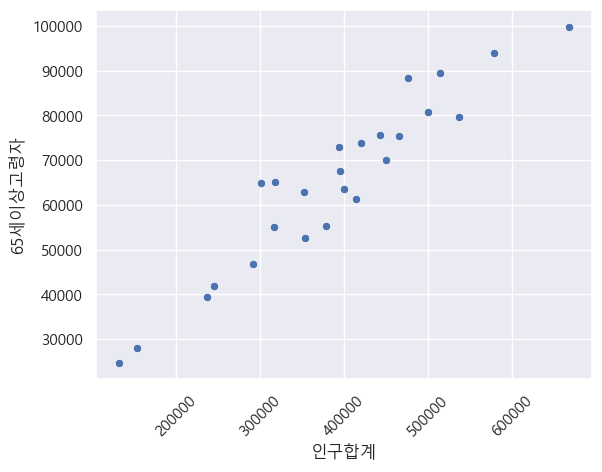

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import scipy.stats as spst
display(spst.pearsonr(new['인구합계'],new['65세이상고령자']))
sns.scatterplot(x='인구합계',y='65세이상고령자',data=new)
plt.xticks(rotation=45)
plt.show()

(0.9513532720515858, 2.993573871240667e-13)

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [12]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---